## Import libraries and modules

In [1]:
from unityagents import UnityEnvironment
from collections import deque
import random
import torch
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from dqnAgent import Agent # due to some reason, have to run this in a separate cell to avoid kernel restart

## Create the Unity env
Initialize the environment in the code cell below.

In [3]:
env = UnityEnvironment(file_name="Banana")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


## Define the agent
Set the training episodes, the maximum horizons in each episode, and run the agent.

In [4]:
def dqn(agent, n_episodes=4000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.999, train=True):
    """Deep Q-Learning.
    
    Args
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        train (bool): flag deciding if the agent will train or just play through the episode
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps if train else 0.0)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            if train:
                agent.step(state, action, reward, next_state, done)
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0 and train:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_dqn.pth')
            break
    return scores

## Train the agent and plot scores

In [5]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
scores = dqn(agent)

Episode 100	Average Score: 0.19
Episode 200	Average Score: 0.76
Episode 300	Average Score: 1.43
Episode 400	Average Score: 2.44
Episode 500	Average Score: 3.60
Episode 600	Average Score: 4.22
Episode 700	Average Score: 5.46
Episode 800	Average Score: 6.64
Episode 900	Average Score: 7.21
Episode 1000	Average Score: 7.43
Episode 1100	Average Score: 8.41
Episode 1200	Average Score: 9.20
Episode 1300	Average Score: 10.19
Episode 1400	Average Score: 10.74
Episode 1500	Average Score: 11.54
Episode 1600	Average Score: 11.04
Episode 1700	Average Score: 12.27
Episode 1800	Average Score: 12.17
Episode 1900	Average Score: 11.55
Episode 2000	Average Score: 12.37
Episode 2100	Average Score: 12.93
Episode 2102	Average Score: 13.06
Environment solved in 2002 episodes!	Average Score: 13.06


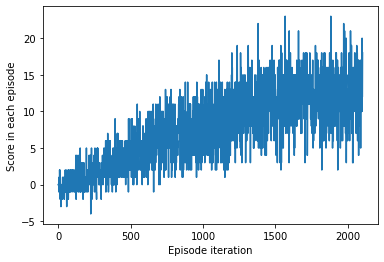

In [6]:
# plot training scores
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score in each episode')
plt.xlabel('Episode iteration')
plt.show()

## Watch the agent
In the next code cell, you will load the trained weights from file to watch a smart agent!

In [7]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0, filename='model.pth')
scores = dqn(agent, n_episodes=2, train=False)

Episode 2	Average Score: 16.00

## Close the environment

In [8]:
env.close()

## Conclusion
In this exercise, you have implemented a DQN agent and demonstrated how to use it to solve an OpenAI Gym environment. 